1. Source: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

2. A list of data collected by the mayo clinic that relates to cirrhosis of the liver.

3. stage

4. A person

5. Classification

6. 19

7. 418

8. None

1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT: SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)


In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score,recall_score,mean_absolute_error,
                             mean_squared_error,explained_variance_score,
                             max_error,classification_report,r2_score,confusion_matrix,
                             roc_curve,roc_auc_score,ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.preprocessing import (StandardScaler,OrdinalEncoder,OneHotEncoder)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,ColumnTransformer,make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

C:\Users\Mikey\anaconda3\envs\dojo-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df=pd.read_csv('C:/Users/Mikey/Documents/GitHub/dojo-env-setup/Project-2/imports/cirrhosis.csv')

In [3]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

#Data Cleaing

In [7]:
df.reset_index()

,index,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,...,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,...,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,...,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,3,1012,D,D-penicillamine,25594,M,N,N,N,...,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,...,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,4,5,1504,CL,Placebo,13918,F,N,Y,Y,...,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,414,681,D,NaN,24472,F,NaN,NaN,NaN,...,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,...,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,...,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,416,417,691,C,NaN,21185,F,NaN,NaN,NaN,...,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [8]:
#Columns to lower case for ease of use.
df.columns=df.columns.str.lower()

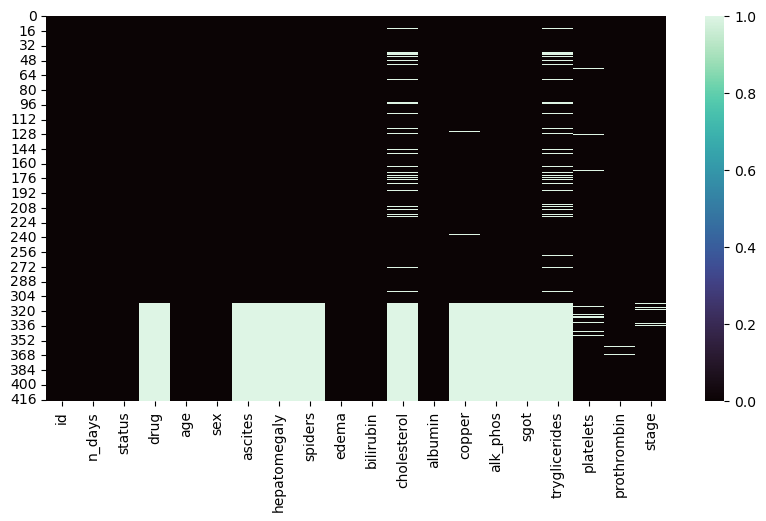

In [9]:
#Visual for missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(),cmap='mako');

In [10]:
#Percentages of missing values.
percent_missing=df.isna().sum()*100/len(df)
print(percent_missing)

id                0.000000
n_days            0.000000
status            0.000000
drug             25.358852
age               0.000000
sex               0.000000
ascites          25.358852
hepatomegaly     25.358852
spiders          25.358852
edema             0.000000
bilirubin         0.000000
cholesterol      32.057416
albumin           0.000000
copper           25.837321
alk_phos         25.358852
sgot             25.358852
tryglicerides    32.535885
platelets         2.631579
prothrombin       0.478469
stage             1.435407
dtype: float64


In [11]:
#Copies for Exploratory data analysis and machine learning
eda_df=df.copy(deep=True)
ml_df=df.copy(deep=True)

In [12]:
#Dropping ID not needed.
eda_df.drop(columns=['id'],inplace=True)
ml_df.drop(columns=['id'],inplace=True)

In [13]:
#Divide age by 365 to convert to years.
eda_df['age']=(eda_df['age']/365)
ml_df['age']=(ml_df['age']/365)
#Float64 to int64
eda_df['age']=eda_df['age'].astype('int64')
ml_df['age']=ml_df['age'].astype('int64')

In [14]:
#Filters for cleaning up missing values.EDA
cat_col=eda_df.select_dtypes(['object']).columns
num_col=eda_df.select_dtypes(['float64','int64']).columns
#ML
cat_col2=ml_df.select_dtypes(['object']).columns
num_col2=ml_df.select_dtypes(['float64','int64']).columns

In [15]:
cat_col2=ml_df.select_dtypes(['object']).columns
num_col2=ml_df.select_dtypes(['float64','int64']).columns

In [16]:
#Dropping stuff under 3% of NaN values.
ml_df.dropna(subset=['platelets'], inplace=True)
eda_df.dropna(subset=['platelets'], inplace=True)
ml_df.dropna(subset=['prothrombin'], inplace=True)
eda_df.dropna(subset=['prothrombin'], inplace=True)
ml_df.dropna(subset=['stage'], inplace=True)
eda_df.dropna(subset=['stage'], inplace=True)

In [17]:
#Percentages of missing values.
percent_missing=ml_df.isna().sum()*100/len(df)
print(percent_missing)

n_days            0.000000
status            0.000000
drug             21.770335
age               0.000000
sex               0.000000
ascites          21.770335
hepatomegaly     21.770335
spiders          21.770335
edema             0.000000
bilirubin         0.000000
cholesterol      28.468900
albumin           0.000000
copper           22.248804
alk_phos         21.770335
sgot             21.770335
tryglicerides    28.947368
platelets         0.000000
prothrombin       0.000000
stage             0.000000
dtype: float64


In [18]:
for n in num_col:
    eda_df[n].fillna(eda_df[n].median(),inplace=True)
    
for m in cat_col:
    eda_df[m].fillna(eda_df[m].mode().values[0],inplace=True)
    
print(eda_df.isna().sum())

n_days           0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomegaly     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64


In [19]:
for n in num_col2:
    ml_df[n].fillna(ml_df[n].median(),inplace=True)
    
for m in cat_col2:
    ml_df[m].fillna(ml_df[m].mode().values[0],inplace=True)

print(ml_df.isna().sum())

n_days           0
status           0
drug             0
age              0
sex              0
ascites          0
hepatomegaly     0
spiders          0
edema            0
bilirubin        0
cholesterol      0
albumin          0
copper           0
alk_phos         0
sgot             0
tryglicerides    0
platelets        0
prothrombin      0
stage            0
dtype: int64


In [20]:
for column in ml_df.columns:
    value_counts = ml_df[column].value_counts()
    print(f"Value counts for column '{column}':\n{value_counts}\n")

Value counts for column 'n_days':
2224    2
2563    2
3445    2
597     2
1170    2
       ..
3150    1
3149    1
2796    1
2944    1
976     1
Name: n_days, Length: 381, dtype: int64

Value counts for column 'status':
C     224
D     150
CL     25
Name: status, dtype: int64

Value counts for column 'drug':
D-penicillamine    247
Placebo            152
Name: drug, dtype: int64

Value counts for column 'age':
52    23
56    18
48    16
44    15
41    15
62    14
46    14
51    14
55    13
53    13
54    12
58    11
61    11
50    11
49    11
42    11
40    11
38    11
67    10
33    10
35    10
45     9
43     9
59     8
47     8
36     7
37     7
64     7
63     7
57     6
60     6
70     6
34     5
69     5
32     5
39     5
65     4
66     4
68     3
30     3
31     2
28     1
71     1
76     1
75     1
29     1
72     1
78     1
74     1
26     1
Name: age, dtype: int64

Value counts for column 'sex':
F    356
M     43
Name: sex, dtype: int64

Value counts for column 'ascites':
N   

In [21]:
#Encoding values for ML
#Class the encoder
encoder=LabelEncoder()
#List of columns to fix.
encoder_cols=['edema','spiders','hepatomegaly','ascites','sex','drug']
for col in encoder_cols:
    ml_df[col]=encoder.fit_transform(ml_df[col])

#Exploritory data analysis visualizations

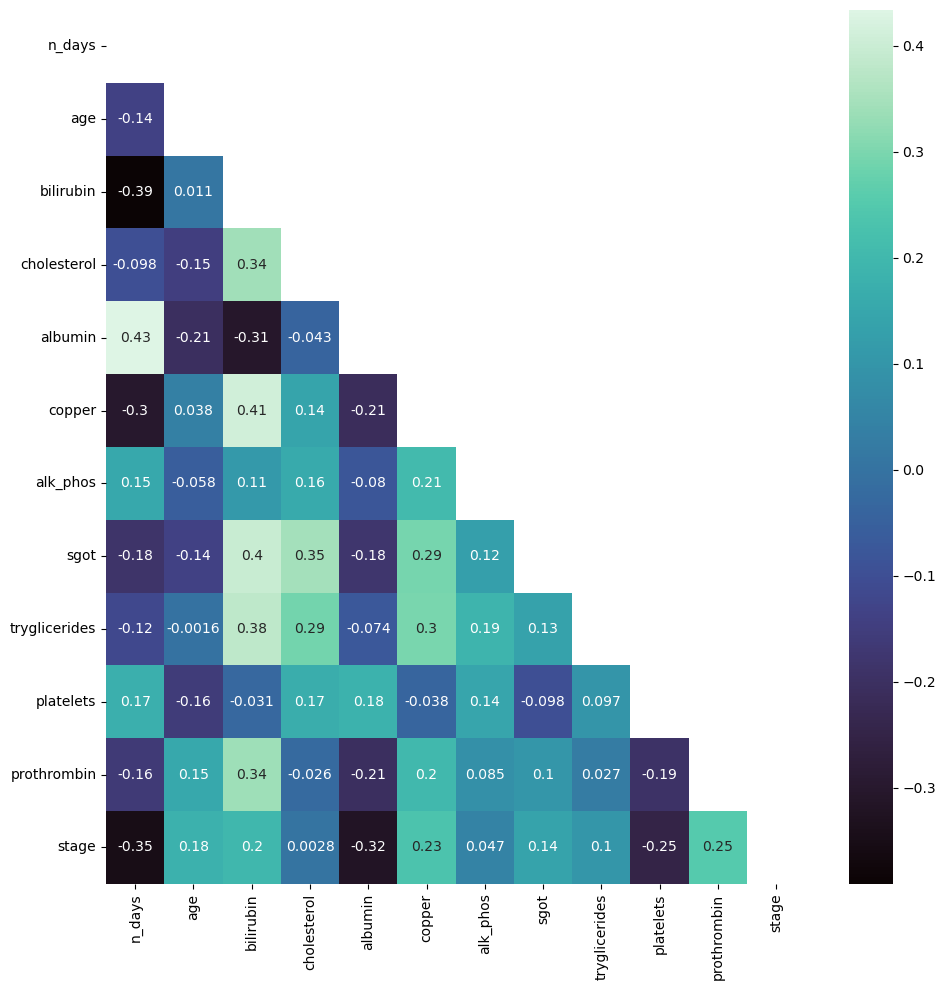

In [22]:
#Heat Map
corr=eda_df.corr()
mask=np.triu(np.ones_like(corr))
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='mako',mask=mask)
plt.tight_layout();

# Insights from heatmap we can see a few different things
## Positive Correlations
* n_days and albumin
* bilirubin correlates to prothrombin, triglycerides, sgot,copper, cholesterol
* cholesterol and sgot
* copper and sgot

## Negative Correlations
* n_days has a negative correlation with stage, copper, and bilirubin
* bilirubin and albumin
* albumin and stage

### These insights could help us make some final predictions.

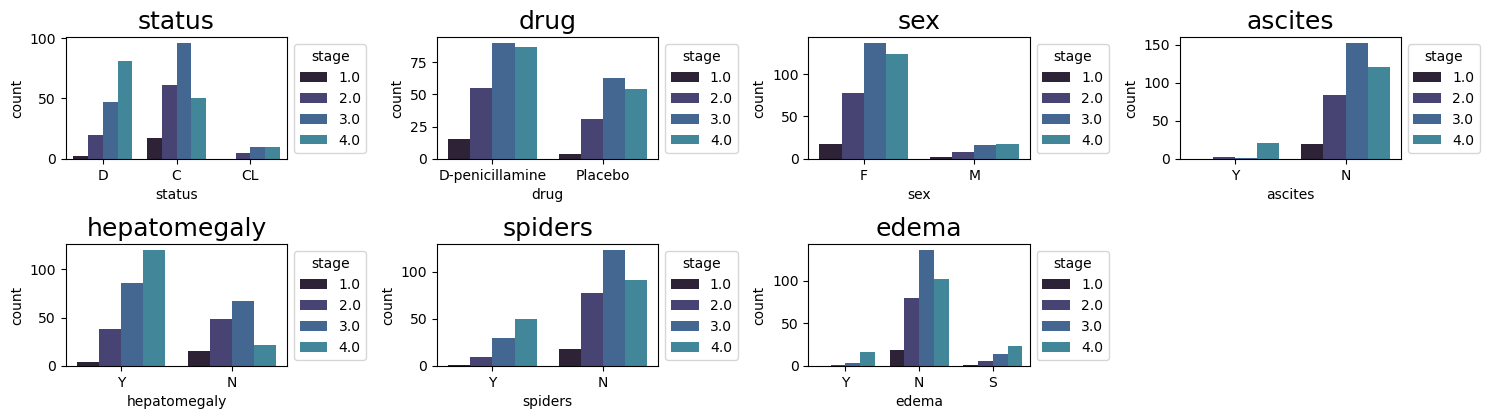

In [23]:
title2=cat_col[:].tolist()
plt.figure(figsize=(15,8))
for i, variable in enumerate(cat_col[:]):
    plt.subplot(4,4,i+1)
    sns.set_palette('mako')
    sns.countplot(x=eda_df[variable],hue='stage',data=eda_df)
    plt.tight_layout()
    plt.title(title2[i],size=18)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1),title='stage')

#Identify Outliers

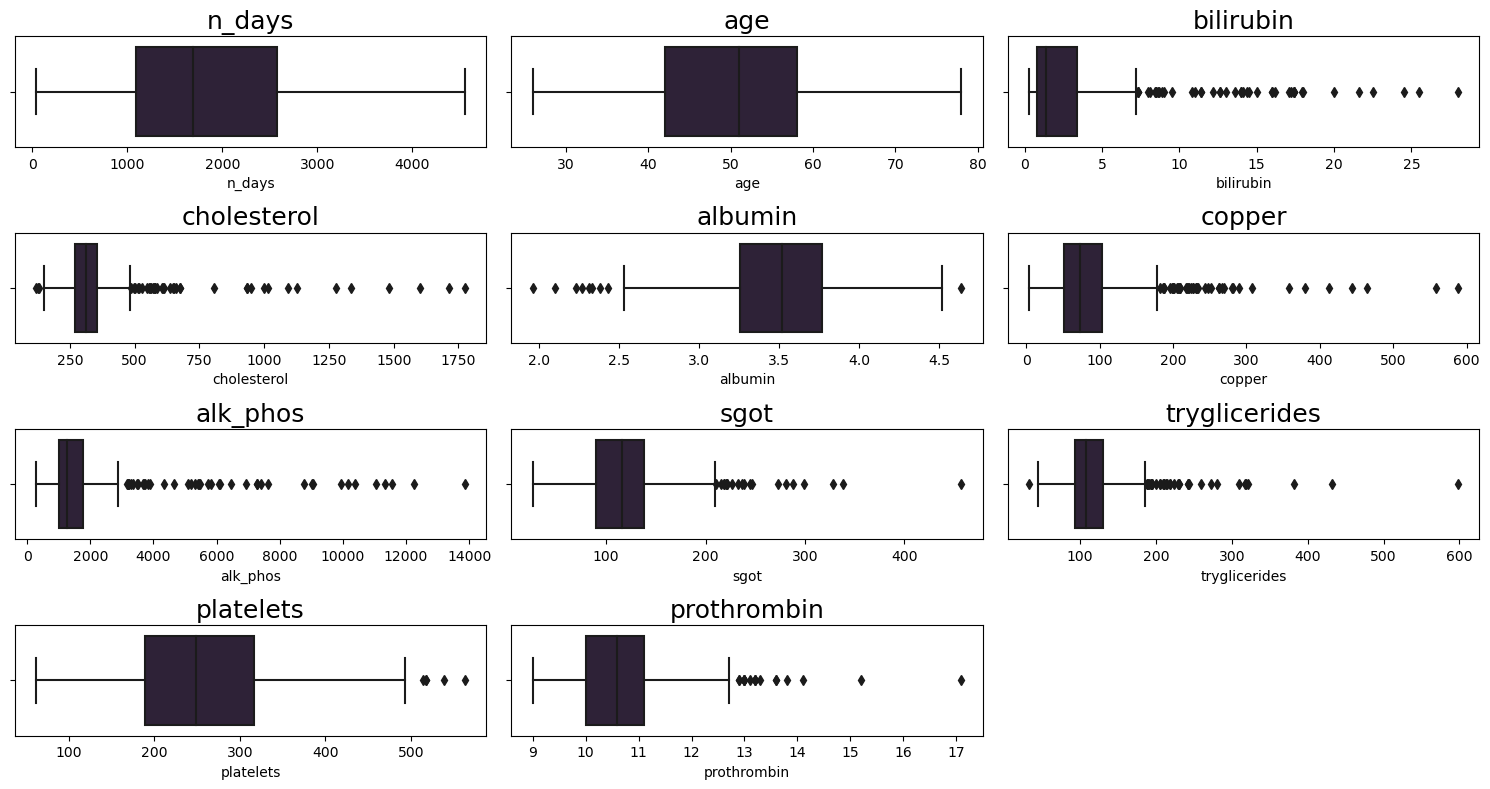

In [24]:
title=num_col[:-1].tolist()
plt.figure(figsize=(15,8))
for i, variable in enumerate(num_col[:-1]):
    plt.subplot(4,3,i+1)
    sns.set_palette('mako')
    sns.boxplot(x=eda_df[variable],data=eda_df,orient="v")
    plt.tight_layout()
    plt.title(title[i],size = 18)

In [25]:
#Dropping due to outliers, tryglicerides had 30% missing data.
ml_df.drop(columns=['cholesterol','tryglicerides','alk_phos'],inplace=True)

#Outliers May Include

*   Bilirubin
*   Cholesterol
*   Albumin
*   Copper
*   Alk_phos
*   Sgot
*   Tryglicerides
*   Platelets
*   Prothrombin



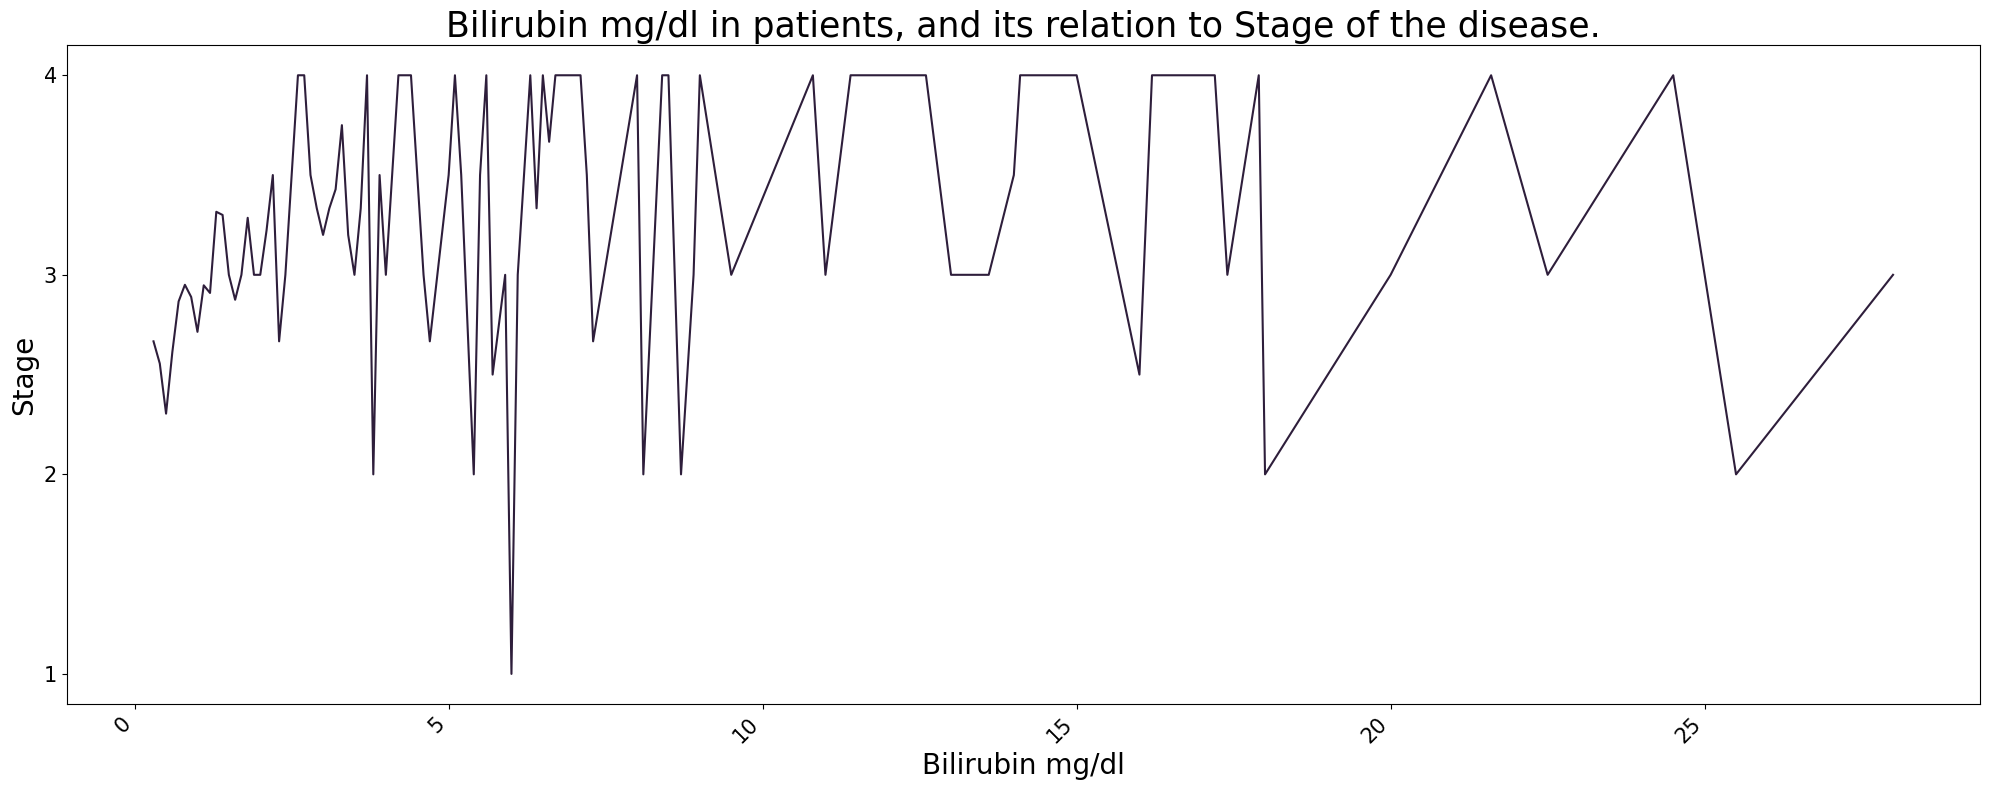

In [26]:
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=eda_df,x='bilirubin',y='stage',ci=None)
ax.set_title('Bilirubin mg/dl in patients, and its relation to Stage of the disease.',fontsize=25)
ax.set_xlabel('Bilirubin mg/dl',fontsize=20)
ax.set_ylabel('Stage',fontsize=20)
ax.set_yticks((1,2,3,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
plt.tight_layout();

### This line plot shows us that when Bilirubin is above 7~mg/dl patients are at stage 2 or above of the disease 

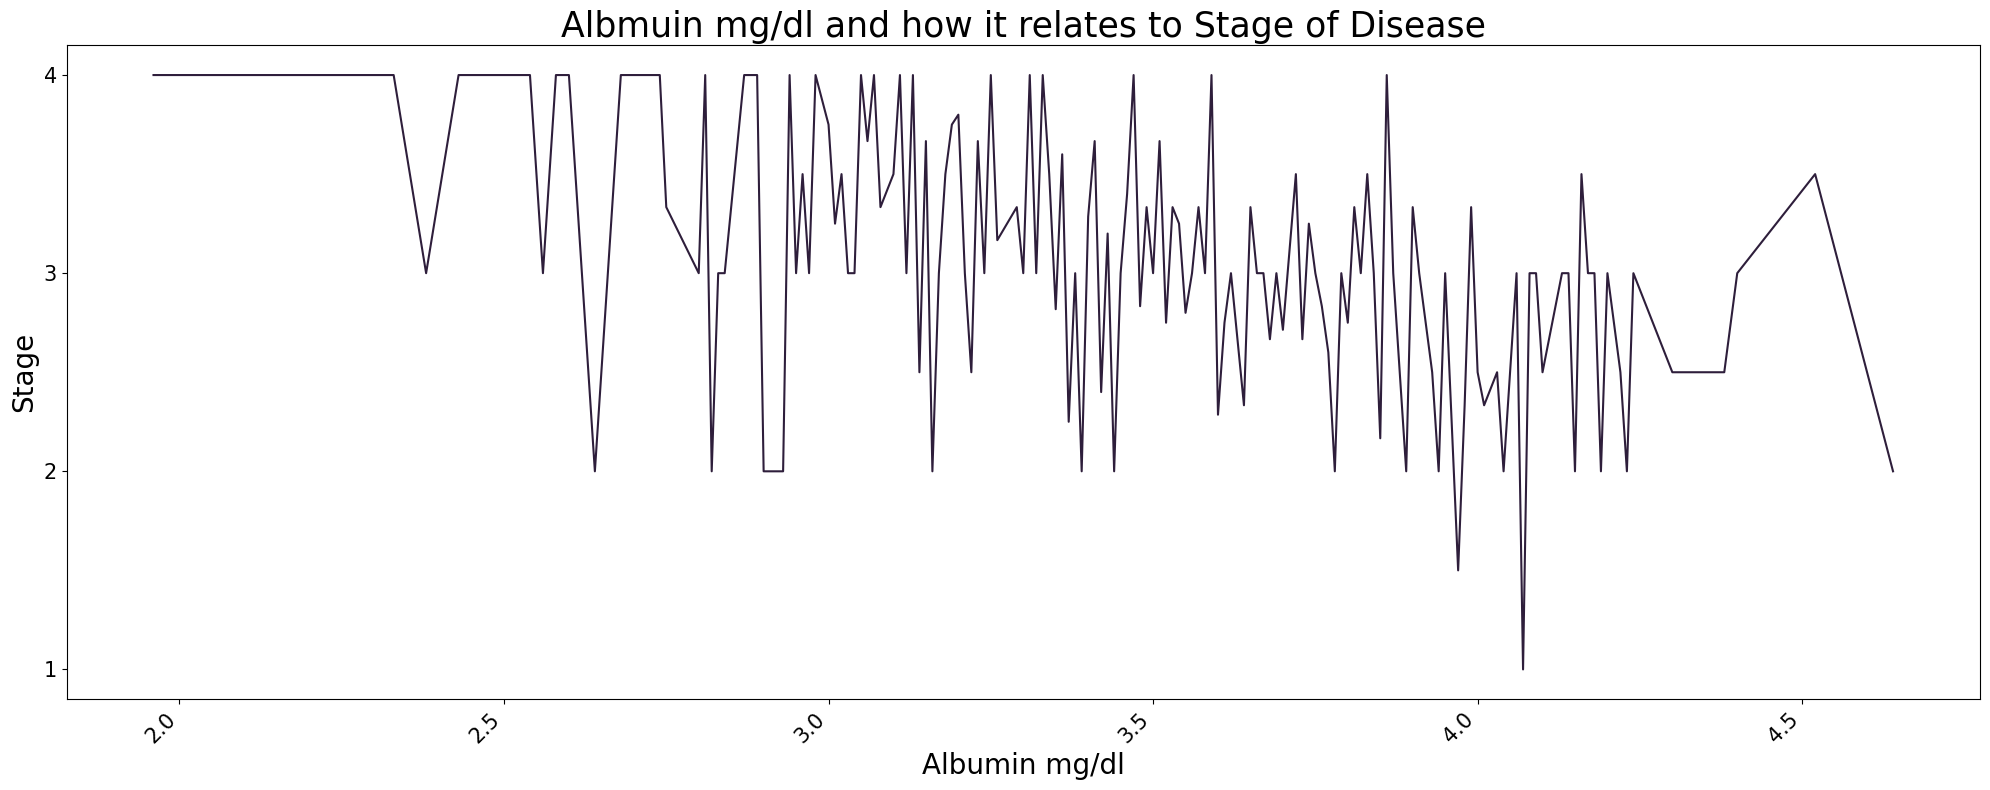

In [27]:
plt.figure(figsize=(20,8))
ax=sns.lineplot(data=eda_df,x='albumin',y='stage',ci=None)
ax.set_title('Albmuin mg/dl and how it relates to Stage of Disease',fontsize=25)
ax.set_xlabel('Albumin mg/dl',fontsize=20)
ax.set_ylabel('Stage',fontsize=20)
ax.set_yticks((1,2,3,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
plt.tight_layout();

### In this lineplot we can see that after 2.5 mg/dl or lower is found in the blood of Albumin we see many if not all patients at stage 3-4 of the disease.

# Models

In [28]:
ml_df['stage'].value_counts()

3.0    153
4.0    141
2.0     86
1.0     19
Name: stage, dtype: int64

In [29]:
ml_df['stage'] = ml_df['stage'].replace([1, 2, 3], 0)
ml_df['stage'] = ml_df['stage'].replace([4], 1)

In [30]:
ml_df['stage'].value_counts()

0.0    258
1.0    141
Name: stage, dtype: int64

In [31]:
# Dropping status and n_days as they are not needed for training.
X=ml_df.drop(columns=['stage','status','n_days'])
y=ml_df['stage']

In [32]:
#Scaler
scaler=StandardScaler()
ohe=OneHotEncoder()
#Selector
num_selector=make_column_selector(dtype_include='number')
cat_selector=make_column_selector(dtype_include='object')
#NumPipe
num_pipe=make_pipeline(scaler)
#Preprocessor pipeline
preprocessor=make_column_transformer((num_pipe, num_selector),(ohe, cat_selector))
#PCA transformer
pca=PCA()
# Preprocess the entire dataset
X_preprocessed=preprocessor.fit_transform(X)
# Split preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y,random_state=42)

In [33]:
def classification_metrics(model, X_test, y_test, label='Test Data',figsize=(15,5),
                           normalize='true',cmap='Greens',thresh=0.5):
    fig, axes=plt.subplots(1, 2,figsize=figsize)
    y_pred=model.predict(X_test)
    print('---' * 20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---' * 20)
    print(classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred,normalize=normalize)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot(ax=axes[0],cmap=cmap)
    y_scores=model.predict_proba(X_test)
    if y_scores.shape[1]>1:
        fpr,tpr,thresholds=roc_curve(y_test,y_scores[:,1])
        roc_auc=roc_auc_score(y_test,y_scores[:,1])
        roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
        roc_display.plot(ax=axes[1])
    plt.show()

In [34]:
X.shape

(399, 13)

In [35]:
scaled=scaler.fit_transform(X)

In [36]:
pca=PCA()
pca.fit(scaled);

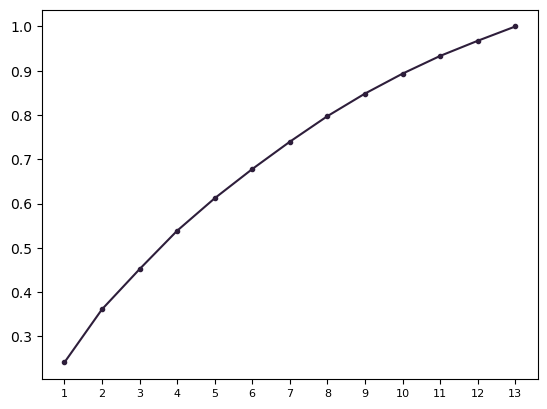

In [37]:
plt.plot(range(1, 14),pca.explained_variance_ratio_.cumsum(),marker= '.')
plt.xticks(ticks=range(1,14),fontsize=8);

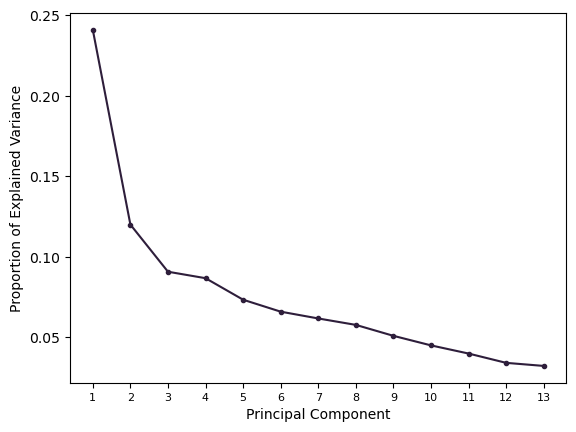

In [38]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 14), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 14), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

In [39]:
pca=PCA(n_components=3)

# K-Nearest Neighbors Classifier

In [40]:
#KNN class
knn_=KNeighborsClassifier()

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: K-Nearest Neighbors w/o PCA Test
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        63
         1.0       0.69      0.59      0.64        37

    accuracy                           0.75       100
   macro avg       0.73      0.72      0.72       100
weighted avg       0.75      0.75      0.75       100



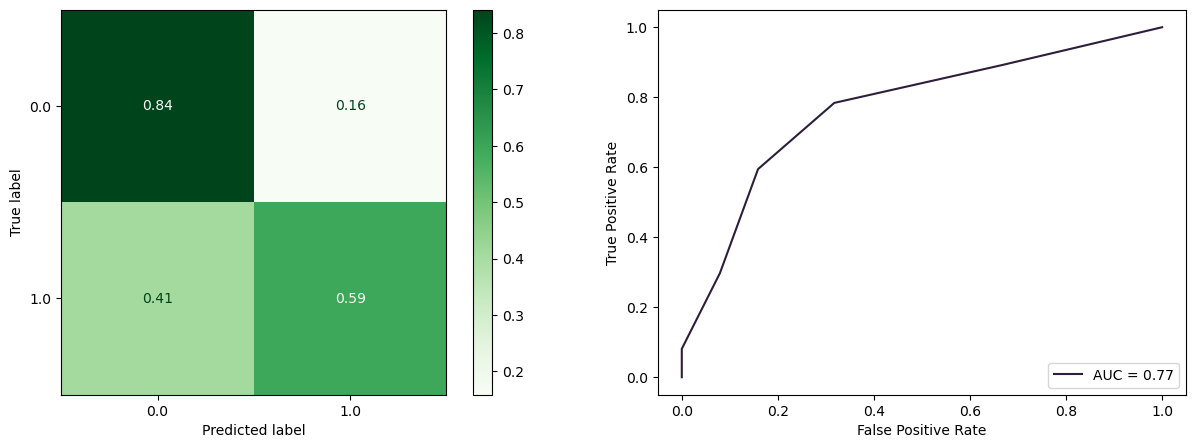

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: K-Nearest Neighbors w/o PCA Train
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       195
         1.0       0.79      0.55      0.65       104

    accuracy                           0.79       299
   macro avg       0.79      0.74      0.75       299
weighted avg       0.79      0.79      0.78       299



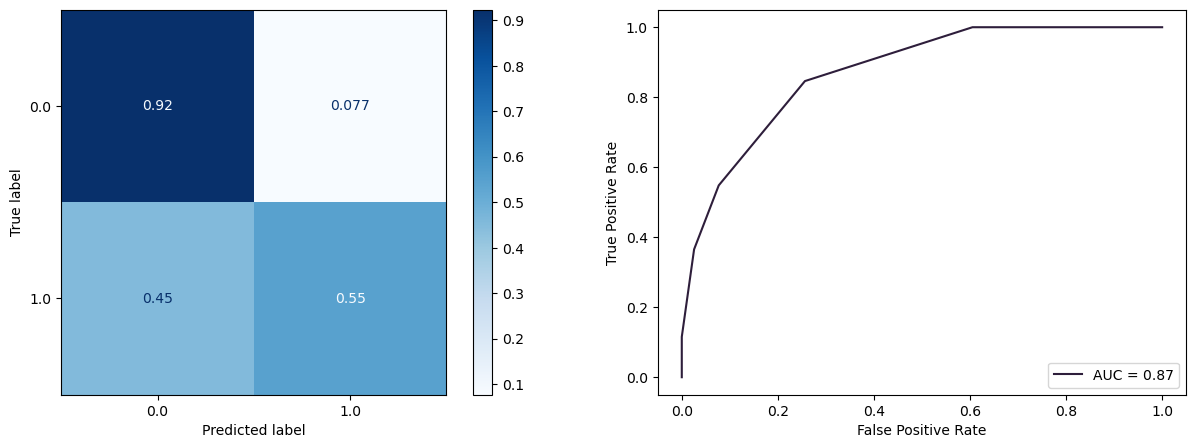

In [41]:
#KNN Pipe
knn=make_pipeline(scaler,knn_)
#Fit
knn.fit(X_train, y_train)
#Predict
knn_test=knn.predict(X_test)
knn_train=knn.predict(X_train)
#Evaluate
classification_metrics(knn,X_test,y_test, thresh=.2,cmap='Greens',
                       label='K-Nearest Neighbors w/o PCA Test')
classification_metrics(knn,X_train,y_train, thresh=.2,cmap='Blues',
                       label='K-Nearest Neighbors w/o PCA Train')

In [42]:
knn.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [43]:
params={'kneighborsclassifier__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        'kneighborsclassifier__weights':['uniform','distance'],
        'kneighborsclassifier__metric':['minkowski','euclidean','manhattan']}

In [44]:
#GridSearch
gridsearcherknn=GridSearchCV(knn,params)
#Gridsearch Fit
gridsearcherknn.fit(X_train,y_train)
#Print best parameters and save them.
print(gridsearcherknn.best_params_)
gridbest_paramsknn=gridsearcherknn.best_estimator_

{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'distance'}


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: K-Nearest Neighbors w/o PCA Test Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        63
         1.0       0.75      0.49      0.59        37

    accuracy                           0.75       100
   macro avg       0.75      0.70      0.71       100
weighted avg       0.75      0.75      0.74       100



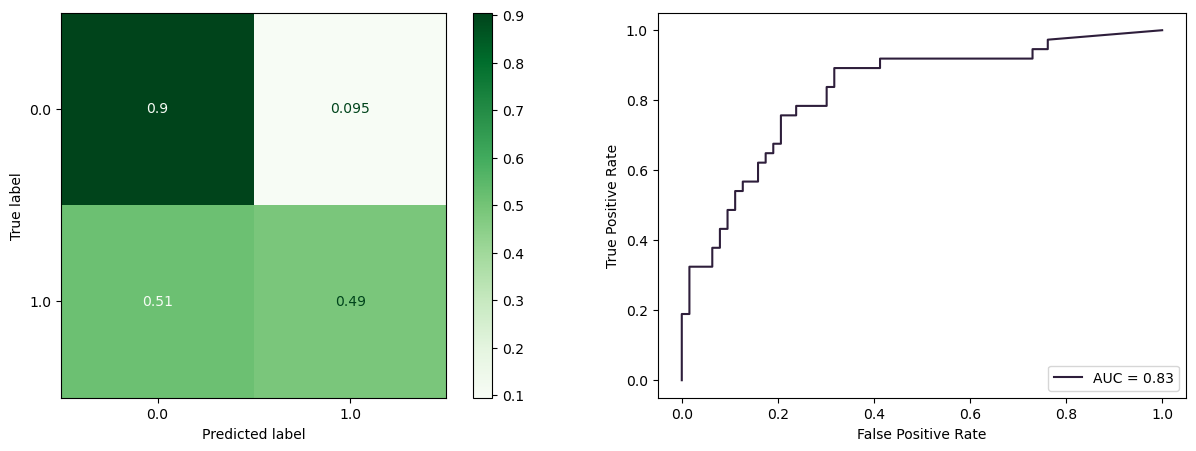

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: K-Nearest Neighbors w/o PCA Train Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



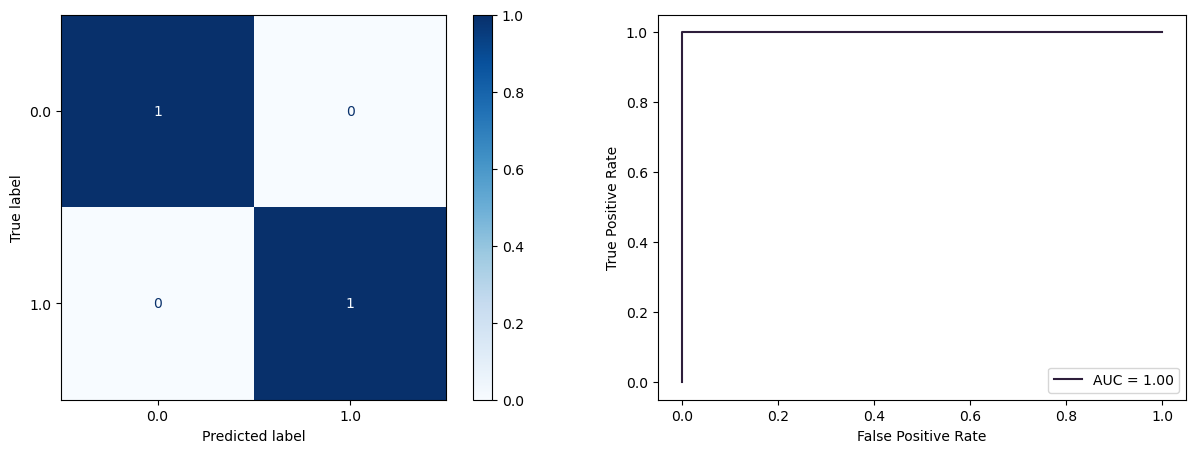

In [45]:
#Fit
gridbest_paramsknn.fit(X_train,y_train)
#Evaluate
classification_metrics(gridbest_paramsknn,X_test,y_test, thresh=.2,cmap='Greens',
                       label='K-Nearest Neighbors w/o PCA Test Tuned')
classification_metrics(gridbest_paramsknn,X_train,y_train, thresh=.2,cmap='Blues',
                       label='K-Nearest Neighbors w/o PCA Train Tuned')

# K-Nearest Neighbors w/ PCA

In [46]:
#KNN with PCA
knn_with_pca=make_pipeline(pca,knn)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: K-Nearest Neighbors w/ PCA Test
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74        63
         1.0       0.56      0.54      0.55        37

    accuracy                           0.67       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.67      0.67      0.67       100



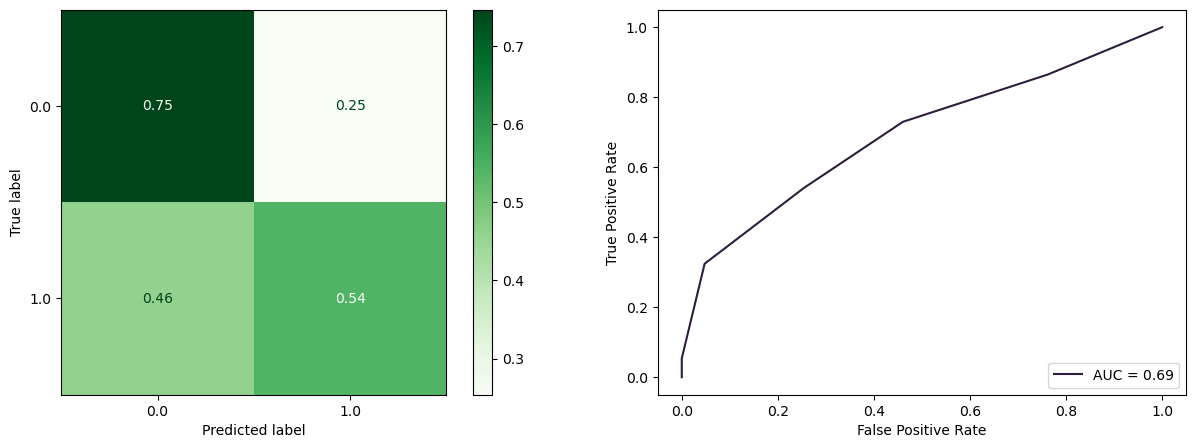

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: K-Nearest Neighbors w/ PCA Train
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85       195
         1.0       0.73      0.68      0.71       104

    accuracy                           0.80       299
   macro avg       0.78      0.77      0.78       299
weighted avg       0.80      0.80      0.80       299



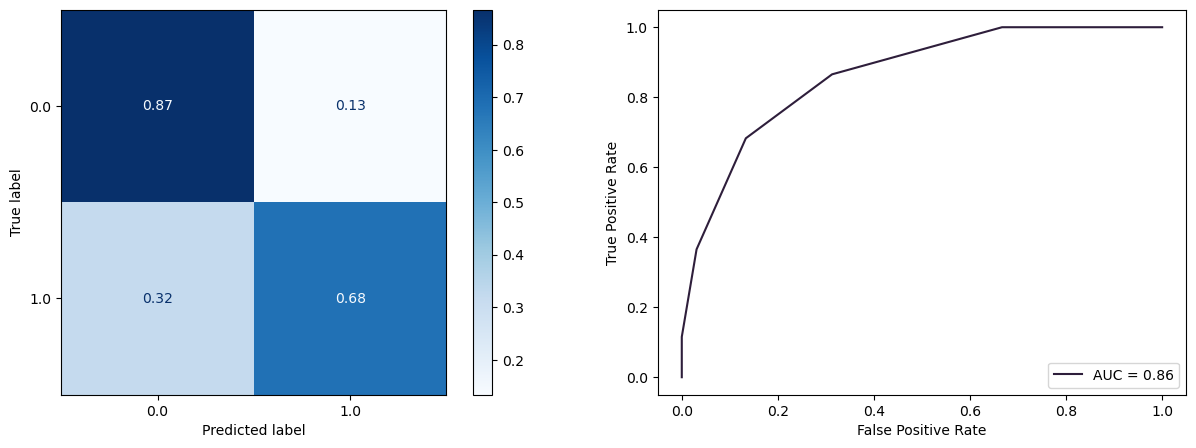

In [47]:
#KNN w/ PCA Pipe
knn_with_pca.fit(X_train, y_train)
#Evaluate
classification_metrics(knn_with_pca,X_test,y_test, thresh=.2,cmap='Greens',
                       label='K-Nearest Neighbors w/ PCA Test')
classification_metrics(knn_with_pca,X_train,y_train, thresh=.2,cmap='Blues',
                       label='K-Nearest Neighbors w/ PCA Train')

In [48]:
knn_with_pca.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=3)),
  ('pipeline',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('kneighborsclassifier', KNeighborsClassifier())]))],
 'verbose': False,
 'pca': PCA(n_components=3),
 'pipeline': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())]),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 3,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'pipeline__memory': None,
 'pipeline__steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'pipeline__verbose': False,
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__kneighborsclassifier': KNeighborsClassifier(),
 'pipeline__standardscaler__copy': True,
 'pipeline__standardscaler__with_mean': True,
 'pipel

In [49]:
params={'pipeline__kneighborsclassifier__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        'pipeline__kneighborsclassifier__weights':['uniform','distance'],
        'pipeline__kneighborsclassifier__metric':['minkowski','euclidean','manhattan']}

In [50]:
#GridSearch
gridsearcherknn_with_pca=GridSearchCV(estimator=knn_with_pca,param_grid=params)
#Gridsearch Fit
gridsearcherknn_with_pca=GridSearchCV(estimator=knn_with_pca,param_grid=params)
gridsearcherknn_with_pca.fit(X_train, y_train)
#Print best parameters and save them.
print(gridsearcherknn_with_pca.best_params_)
gridbest_paramsknn_pca=gridsearcherknn_with_pca.best_estimator_

{'pipeline__kneighborsclassifier__metric': 'minkowski', 'pipeline__kneighborsclassifier__n_neighbors': 11, 'pipeline__kneighborsclassifier__weights': 'uniform'}


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: K-Nearest Neighbors w/ PCA Test Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83        63
         1.0       0.74      0.62      0.68        37

    accuracy                           0.78       100
   macro avg       0.77      0.75      0.75       100
weighted avg       0.78      0.78      0.78       100



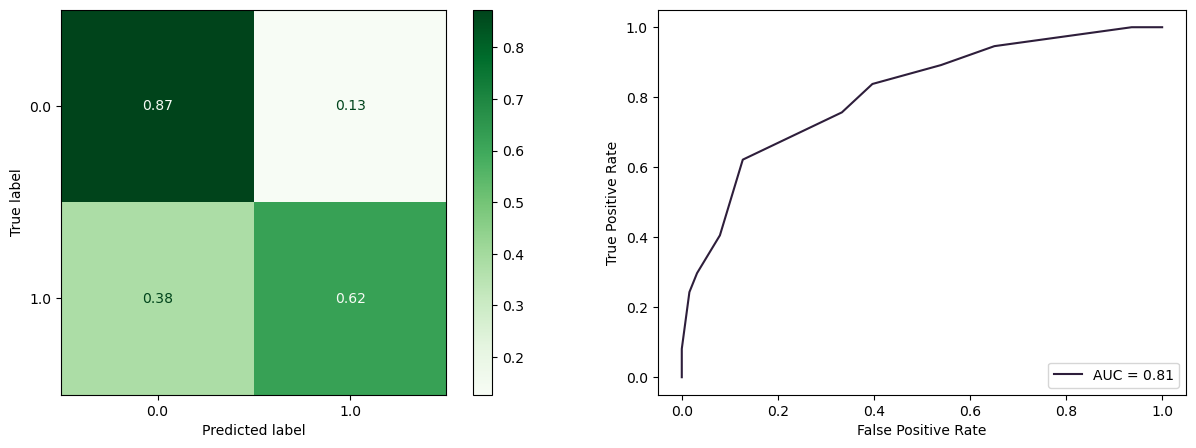

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: K-Nearest Neighbors w/ PCA Train Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       195
         1.0       0.70      0.51      0.59       104

    accuracy                           0.75       299
   macro avg       0.73      0.70      0.71       299
weighted avg       0.75      0.75      0.74       299



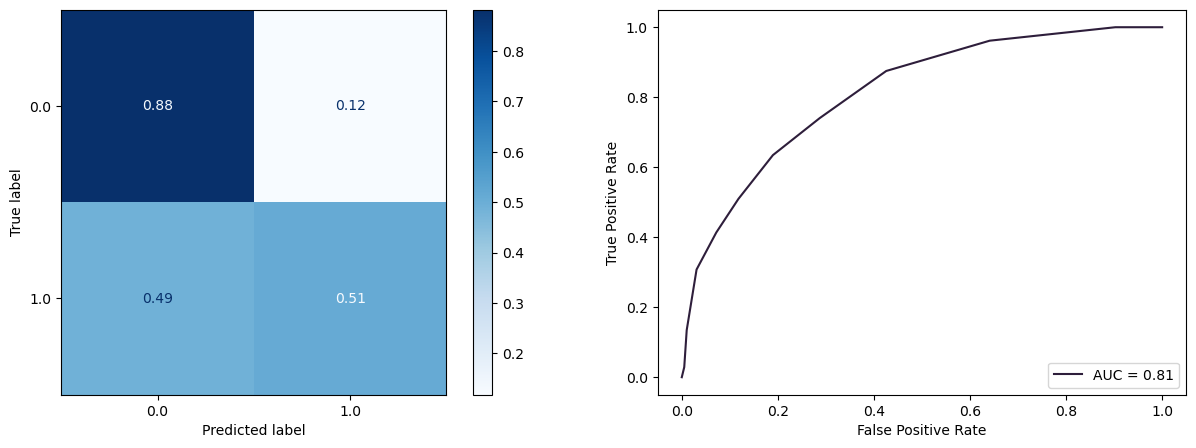

In [51]:
#Fit
gridbest_paramsknn_pca.fit(X_train,y_train)

classification_metrics(gridbest_paramsknn_pca,X_test,y_test, thresh=.2,
                       cmap='Greens',label='K-Nearest Neighbors w/ PCA Test Tuned')
classification_metrics(gridbest_paramsknn_pca,X_train,y_train,thresh=.2,
                       cmap='Blues',label='K-Nearest Neighbors w/ PCA Train Tuned')

# Random Forest Classifier

In [52]:
#Random Forest Classifier
rfc_=RandomForestClassifier()

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Classifier w/o PCA Test
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        63
         1.0       0.68      0.57      0.62        37

    accuracy                           0.74       100
   macro avg       0.72      0.70      0.71       100
weighted avg       0.73      0.74      0.73       100



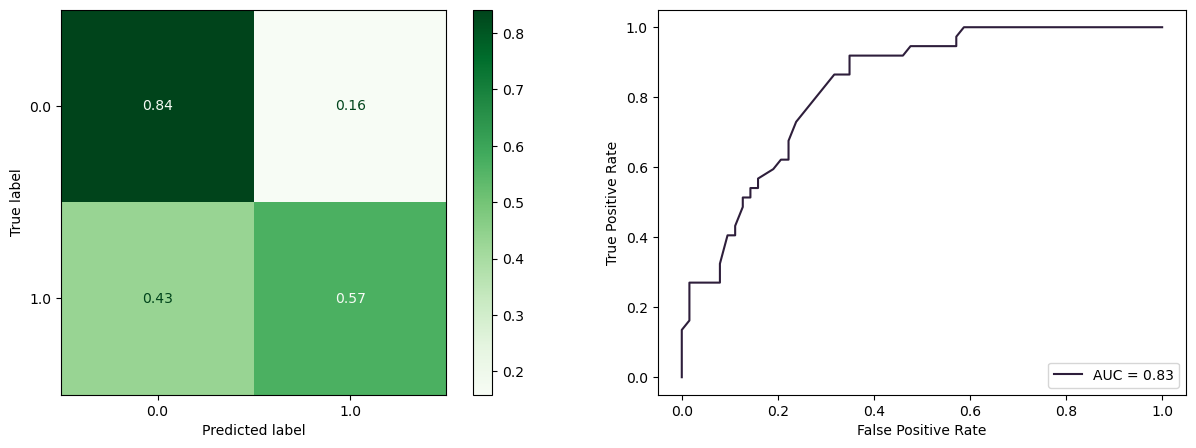

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Classifier w/o PCA Train
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



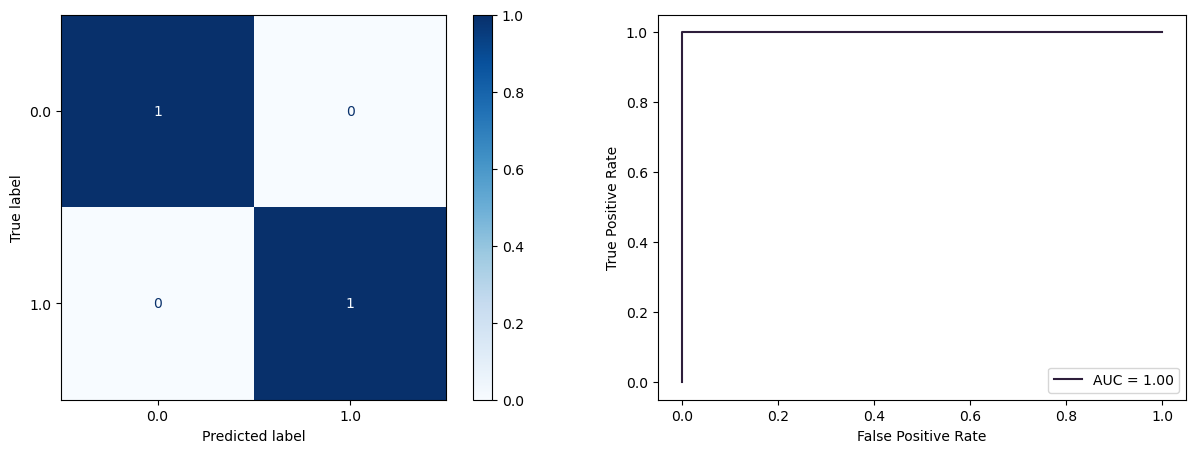

In [53]:
#RFC Pipe
rfc=make_pipeline(scaler,rfc_)
#Fit
rfc.fit(X_train,y_train)
#Evaluate
classification_metrics(rfc,X_test,y_test, thresh=.2,cmap='Greens',
                       label='Random Forest Classifier w/o PCA Test')
classification_metrics(rfc,X_train,y_train, thresh=.2,cmap='Blues',
                       label='Random Forest Classifier w/o PCA Train')

In [54]:
rfc.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 

In [55]:
params={'randomforestclassifier__max_depth':[20,30,40,50],
        'randomforestclassifier__max_features':['log2','auto'],
        'randomforestclassifier__n_estimators':[25,50,150,200]}

In [56]:
#GridSearch
gridsearcher_rfc=GridSearchCV(rfc,params)
#Gridsearch Fit
gridsearcher_rfc.fit(X_train,y_train)
#Print best parameters and save them.
print(gridsearcher_rfc.best_params_)
gridbest_params_rfc=gridsearcher_rfc.best_estimator_

{'randomforestclassifier__max_depth': 50, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__n_estimators': 150}


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Classifier w/o PCA Test Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85        63
         1.0       0.76      0.68      0.71        37

    accuracy                           0.80       100
   macro avg       0.79      0.77      0.78       100
weighted avg       0.80      0.80      0.80       100



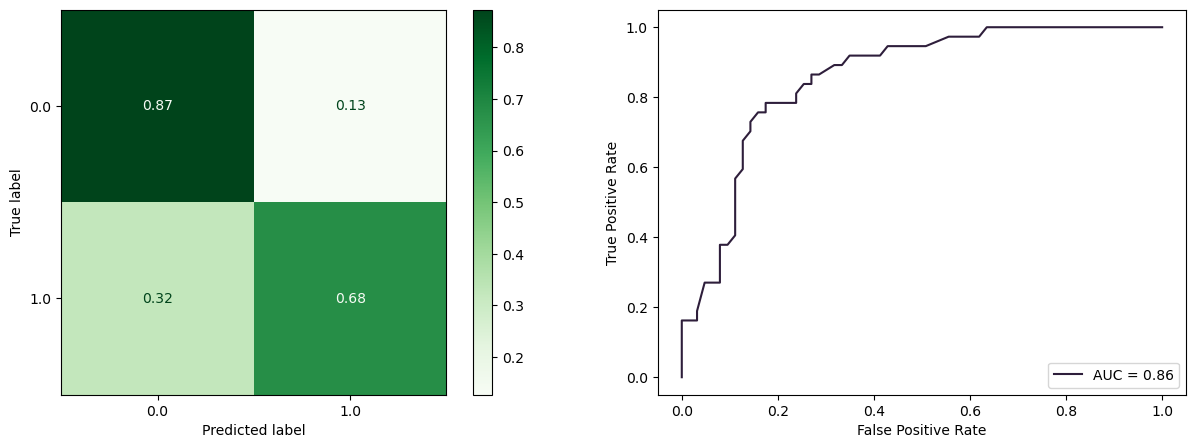

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Classifier w/o PCA Train Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



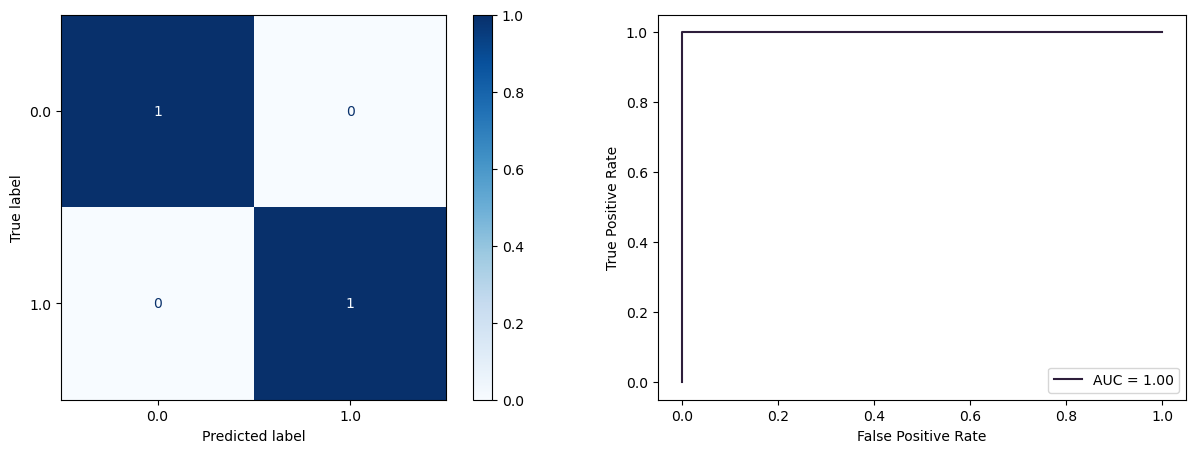

In [57]:
#Fit
gridbest_params_rfc.fit(X_train,y_train)
#Evaluate
classification_metrics(gridbest_params_rfc.fit(X_train,y_train),
                       X_test,y_test, thresh=.2,cmap='Greens',
                       label='Random Forest Classifier w/o PCA Test Tuned')
classification_metrics(gridbest_params_rfc.fit(X_train,y_train),
                       X_train,y_train, thresh=.2,cmap='Blues',
                       label='Random Forest Classifier w/o PCA Train Tuned')

# Random Forest Classifier with PCA

In [58]:
#RFCPCA Class
rfc_pca=make_pipeline(pca,rfc)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Classifier w/o PCA Test
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        63
         1.0       0.68      0.57      0.62        37

    accuracy                           0.74       100
   macro avg       0.72      0.70      0.71       100
weighted avg       0.73      0.74      0.73       100



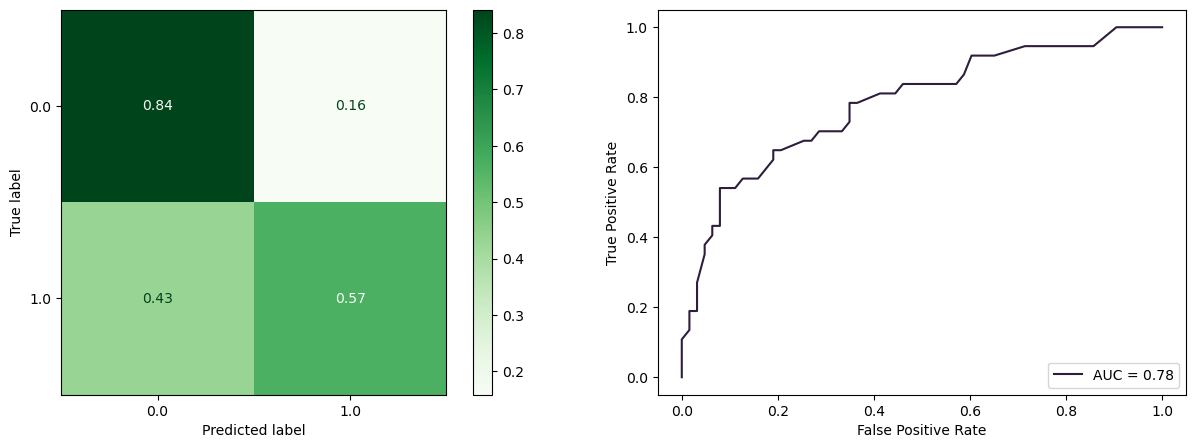

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Classifier w/o PCA Train
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



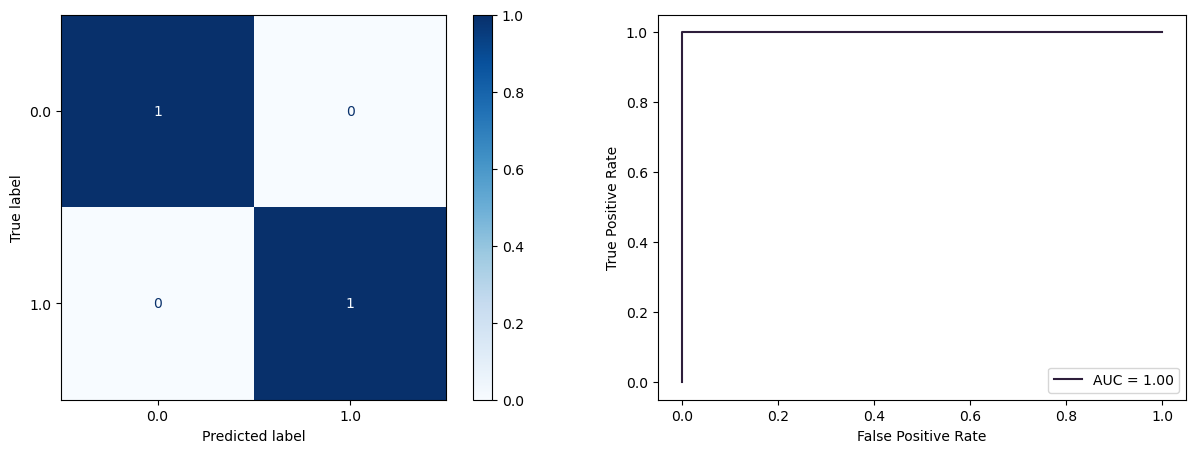

In [59]:
#Fit
rfc_pca.fit(X_train,y_train)
#Evaluate
classification_metrics(rfc_pca,X_test,y_test, thresh=.2,cmap='Greens',
                       label='Random Forest Classifier w/o PCA Test')
classification_metrics(rfc_pca,X_train,y_train, thresh=.2,cmap='Blues',
                       label='Random Forest Classifier w/o PCA Train')

In [60]:
rfc_pca.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=3)),
  ('pipeline',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('randomforestclassifier', RandomForestClassifier())]))],
 'verbose': False,
 'pca': PCA(n_components=3),
 'pipeline': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 3,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'pipeline__memory': None,
 'pipeline__steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier())],
 'pipeline__verbose': False,
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__randomforestclassifier': RandomForestClassifier(),
 'pipeline__standardscaler__copy': True,
 'pipeline__standardscaler__with_mean

In [61]:
params={'pipeline__randomforestclassifier__max_depth':[20,30,40,50],
        'pipeline__randomforestclassifier__max_features':['log2','auto'],
        'pipeline__randomforestclassifier__n_estimators':[25,50,150,200]}

In [62]:
#GridSearch
gridsearcherrfc_pca=GridSearchCV(estimator=rfc_pca,param_grid=params)
#Gridsearch Fit
gridsearcherrfc_pca.fit(X_train,y_train)
#Print best parameters and save them.
print(gridsearcherrfc_pca.best_params_)
gridbest_paramsrfc_pca=gridsearcherrfc_pca.best_estimator_

{'pipeline__randomforestclassifier__max_depth': 20, 'pipeline__randomforestclassifier__max_features': 'log2', 'pipeline__randomforestclassifier__n_estimators': 25}


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Classifier w/ PCA Test Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78        63
         1.0       0.62      0.57      0.59        37

    accuracy                           0.71       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.71      0.71      0.71       100



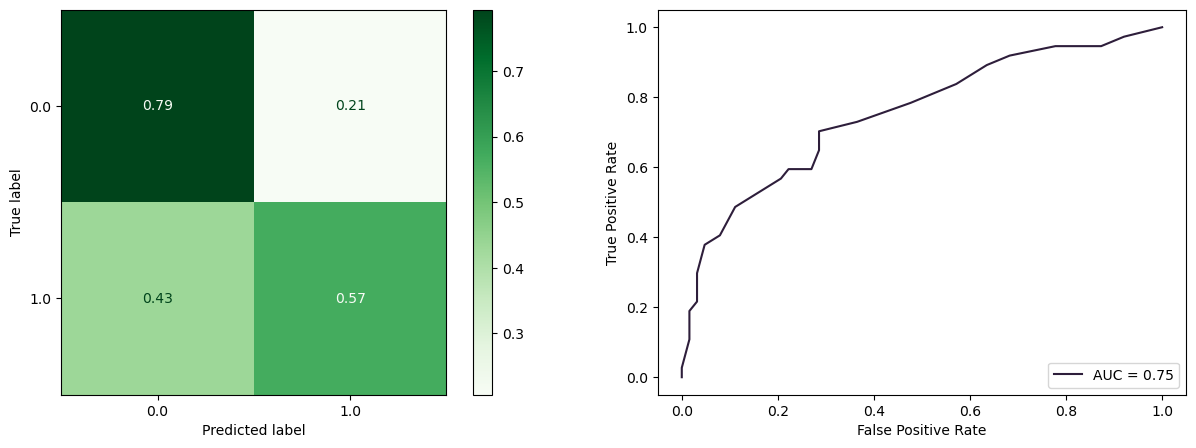

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Random Forest Classifier w/ PCA Train Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       195
         1.0       1.00      0.99      1.00       104

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



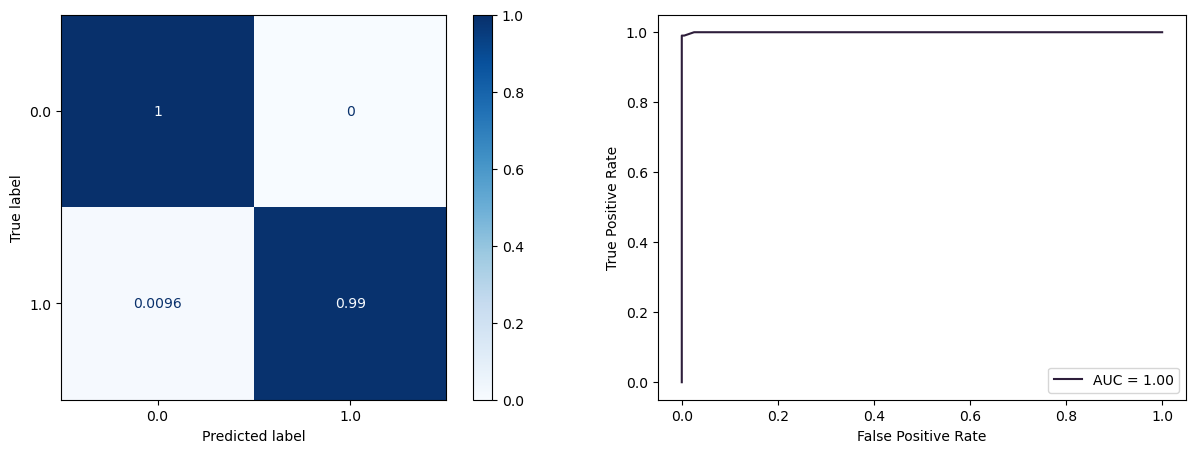

In [63]:
#Fit
gridbest_paramsrfc_pca.fit(X_train,y_train)
#Evaluate
classification_metrics(gridbest_paramsrfc_pca,X_test,y_test, thresh=.2,cmap='Greens',
                       label='Random Forest Classifier w/ PCA Test Tuned')
classification_metrics(gridbest_paramsrfc_pca,X_train,y_train, thresh=.2,cmap='Blues',
                       label='Random Forest Classifier w/ PCA Train Tuned')

# XGBoost w/o PCA

In [64]:
xgb_=XGBClassifier(objective='binary:logistic',eval_metric='error')
xgb_pipe=make_pipeline(scaler,xgb_)

In [65]:
xgb_pipe.fit(X_train,y_train);

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost w/o PCA Test
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76        63
         1.0       0.58      0.57      0.58        37

    accuracy                           0.69       100
   macro avg       0.67      0.66      0.67       100
weighted avg       0.69      0.69      0.69       100



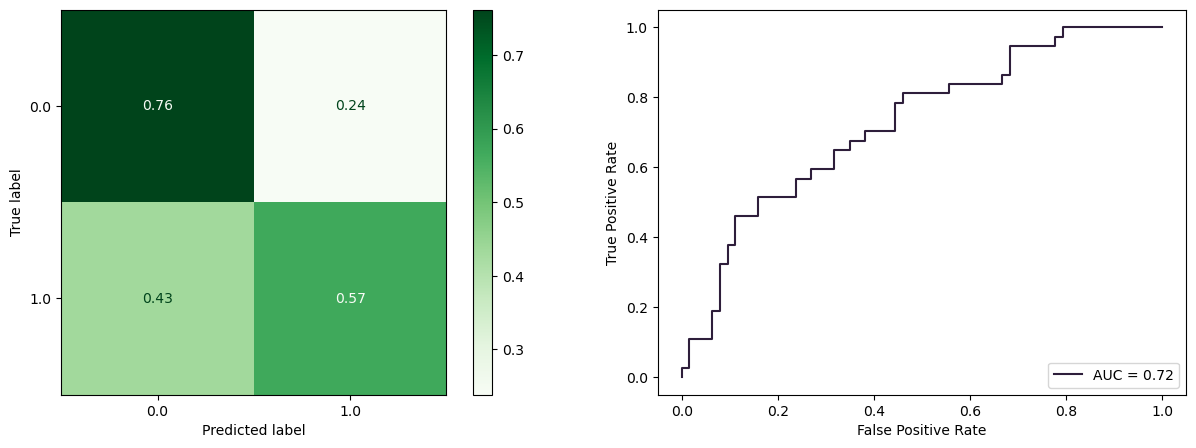

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost w/o PCA Train
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



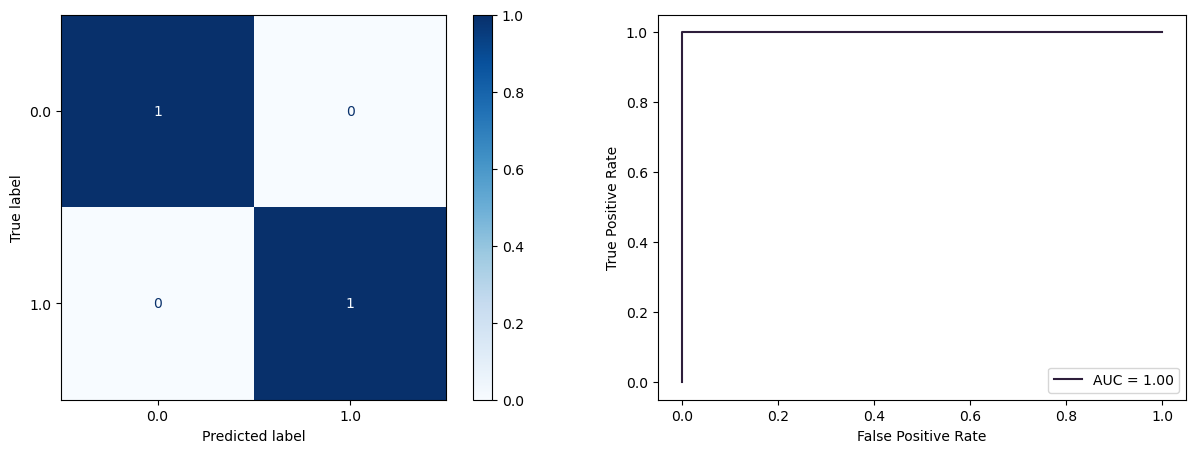

In [66]:
classification_metrics(xgb_pipe,X_test,y_test, thresh=.2,cmap='Greens',
                       label='XGBoost w/o PCA Test')
classification_metrics(xgb_pipe,X_train,y_train, thresh=.2,cmap='Blues',
                       label='XGBoost w/o PCA Train')

In [67]:
#Get Params to try
xgb_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('xgbclassifier',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                 eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
                 interaction_constraints='', learning_rate=0.300000012,
                 max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                 monotone_constraints='()', n_estimators=100, n_jobs=20,
                 num_parallel_tree=1, predictor='auto', random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'xgbclassifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,


In [68]:
params={'xgbclassifier__learning_rate':[0.1,0.01,0.001],
        'xgbclassifier__n_estimators':[100,200,300],
        'xgbclassifier__colsample_bytree':[0.5,0.7,0.9]}

In [69]:
gridsearch_xgb=GridSearchCV(xgb_pipe,params)
gridsearch_xgb.fit(X_train, y_train);
#Print best parameters and save them.
print(gridsearch_xgb.best_params_)
gridbest_params_xgb=gridsearch_xgb.best_estimator_

{'xgbclassifier__colsample_bytree': 0.9, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__n_estimators': 300}


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost w/o PCA Test Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77        63
         1.0       0.61      0.54      0.57        37

    accuracy                           0.70       100
   macro avg       0.68      0.67      0.67       100
weighted avg       0.69      0.70      0.70       100



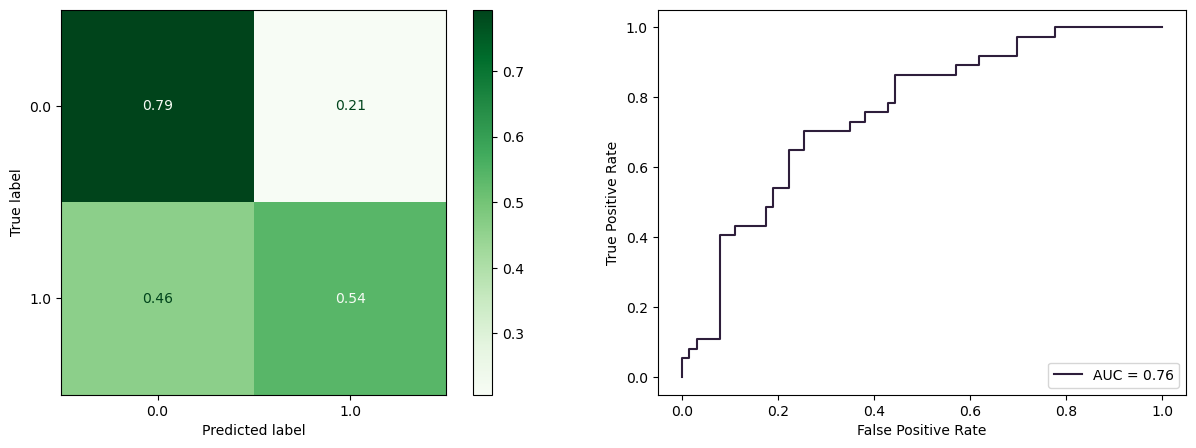

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost w/o PCA Train Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



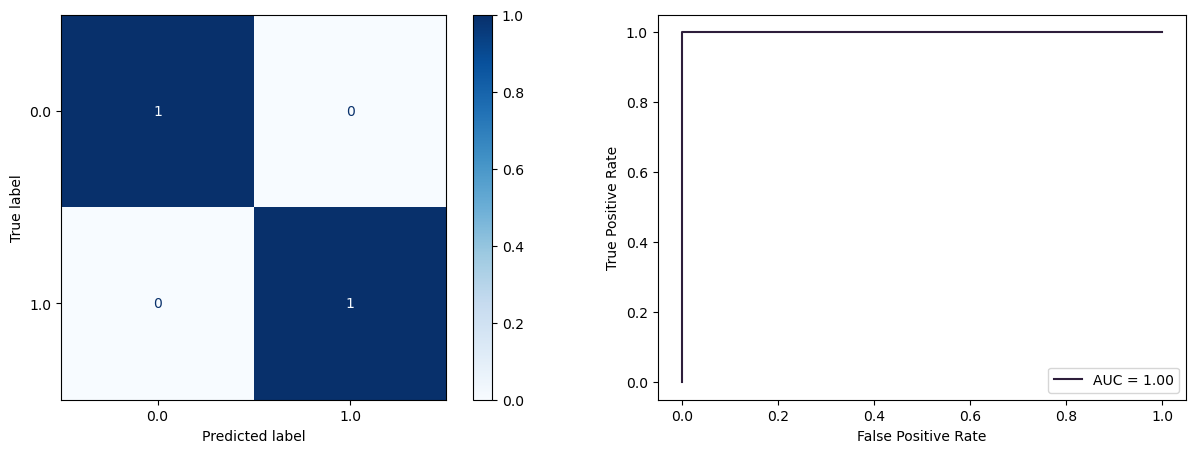

In [70]:
#Fit
gridbest_params_xgb.fit(X_train,y_train);
#Evaluate
classification_metrics(gridbest_params_xgb,X_test,y_test, thresh=.2,cmap='Greens',
                       label='XGBoost w/o PCA Test Tuned')
classification_metrics(gridbest_params_xgb,X_train,y_train, thresh=.2,cmap='Blues',
                       label='XGBoost w/o PCA Train Tuned')

# XGBoost with PCA

In [71]:
xgb_pca=make_pipeline(pca,xgb_)

In [72]:
xgb_pca.fit(X_train,y_train);

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost w/ PCA Test
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74        63
         1.0       0.56      0.54      0.55        37

    accuracy                           0.67       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.67      0.67      0.67       100



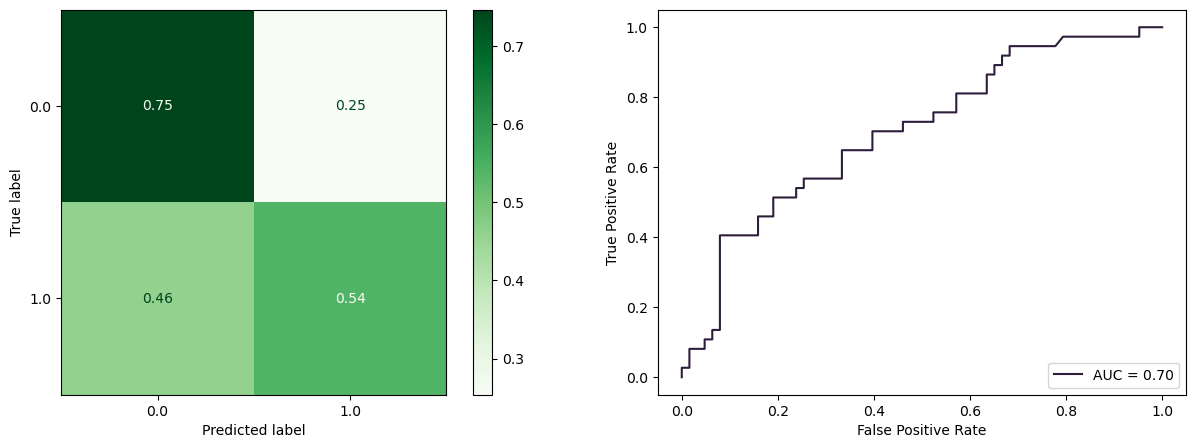

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost w/ PCA Train
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



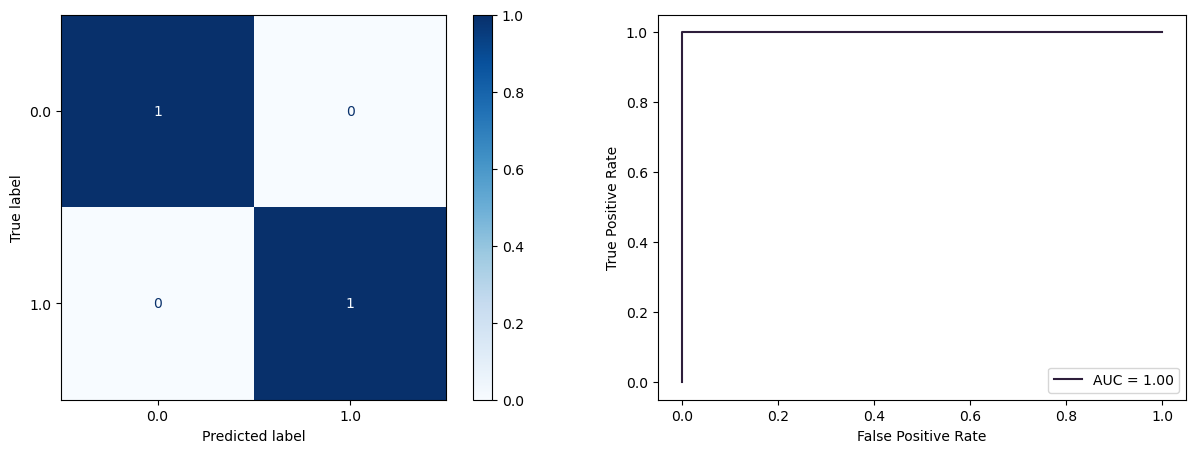

In [73]:
classification_metrics(xgb_pca,X_test,y_test, thresh=.2,cmap='Greens',
                       label='XGBoost w/ PCA Test')
classification_metrics(xgb_pca,X_train,y_train, thresh=.2,cmap='Blues',
                       label='XGBoost w/ PCA Train')

In [74]:
xgb_pca.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=3)),
  ('xgbclassifier',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                 eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
                 interaction_constraints='', learning_rate=0.300000012,
                 max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                 monotone_constraints='()', n_estimators=100, n_jobs=20,
                 num_parallel_tree=1, predictor='auto', random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'pca': PCA(n_components=3),
 'xgbclassifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               e

In [75]:
params={'xgbclassifier__learning_rate':[0.1,0.01,0.001],
        'xgbclassifier__n_estimators':[100,200,300],
        'xgbclassifier__colsample_bytree':[0.5,0.7,0.9]}

In [76]:
gridsearch_xgb_pca=GridSearchCV(xgb_pca,params)
gridsearch_xgb_pca.fit(X_train, y_train);
#Print best parameters and save them.
print(gridsearch_xgb.best_params_)
gridbest_params_xgb=gridsearch_xgb_pca.best_estimator_

{'xgbclassifier__colsample_bytree': 0.9, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__n_estimators': 300}


------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost w/ PCA Test Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79        63
         1.0       0.64      0.49      0.55        37

    accuracy                           0.71       100
   macro avg       0.69      0.66      0.67       100
weighted avg       0.70      0.71      0.70       100



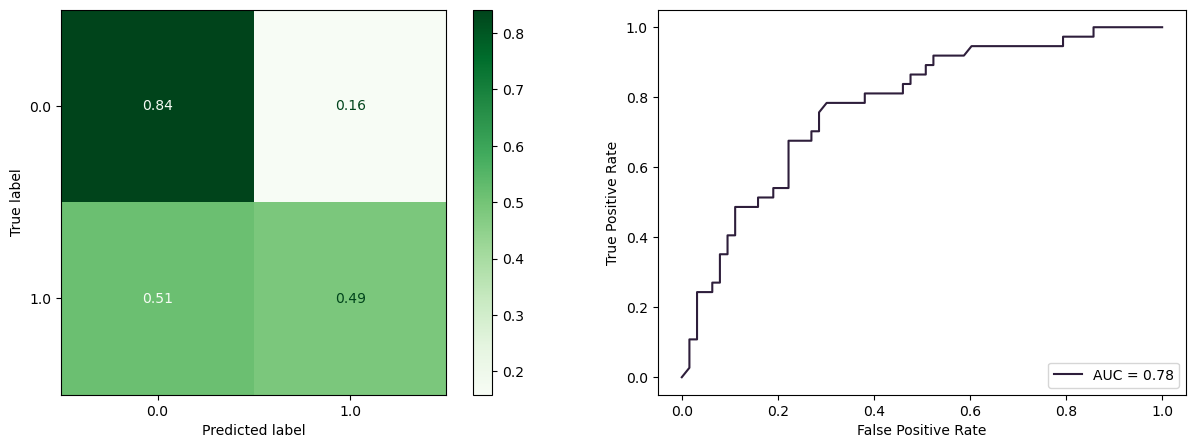

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: XGBoost w/ PCA Train Tuned
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       195
         1.0       0.88      0.65      0.75       104

    accuracy                           0.85       299
   macro avg       0.86      0.80      0.82       299
weighted avg       0.85      0.85      0.84       299



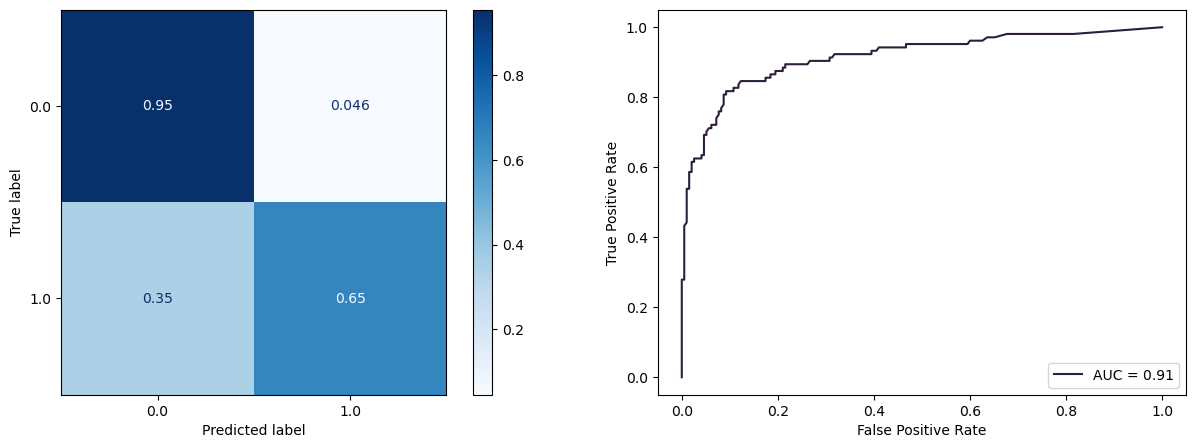

In [77]:
#Fit
gridbest_params_xgb.fit(X_train,y_train);
#Evaluate
classification_metrics(gridbest_params_xgb,X_test,y_test, thresh=.2,cmap='Greens',
                       label='XGBoost w/ PCA Test Tuned')
classification_metrics(gridbest_params_xgb,X_train,y_train, thresh=.2,cmap='Blues',
                       label='XGBoost w/ PCA Train Tuned')

# Random Forest Regressor is my choice of model for this.

### However this model still is not great, our dataset may be too small, also some feature engineering could take place with aide from a subject matter expert. Or changing the problem to a lassification problem.